<a href="https://colab.research.google.com/github/Progra-man/dap-2024/blob/main/les07/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №7. Классификация
##Задания



Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6    

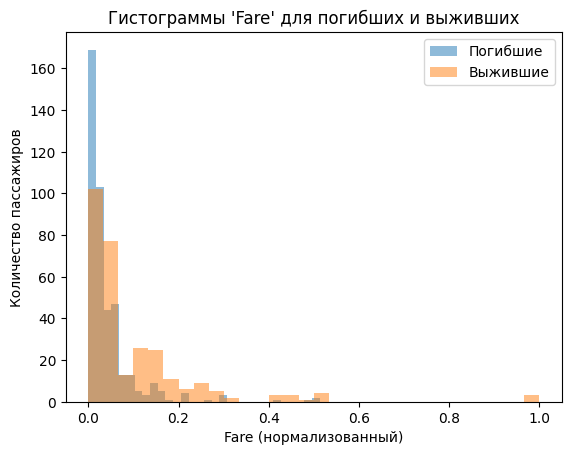

Матрица ошибок:
[[91 16]
 [25 47]]
Точность модели (accuracy): 0.77


In [ ]:
# Импортируем необходимые библиотеки
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Версии библиотек
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

# 1. Извлечение данных
# Загрузка данных
df = pd.read_csv('titanic.csv', index_col="PassengerId")

# Вывод первых 7 строк
print(df.head(7))

# 2. Подготовка данных
# Информация о типах данных
print(df.info())

# Проверяем на наличие не числовых признаков и пропущенных значений
print("Категориальные признаки:", df.select_dtypes(include=['object']).columns.tolist())
print("Пропущенные значения в столбцах:")
print(df.isnull().sum())

# Удаляем ненужные признаки: 'Name', 'Ticket', 'Cabin', 'Embarked'
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Создаём признаки 'male' и 'female' вместо 'Sex'
df['male'] = (df['Sex'] == 'male').astype(int)
df['female'] = (df['Sex'] == 'female').astype(int)
df.drop(['Sex'], axis=1, inplace=True)

# Удаляем строки с пропущенными значениями
df.dropna(inplace=True)

# 3. Исследование данных
# Нормализуем 'Fare' (используем Min-Max нормализацию)
df['Fare'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

# Разница между средними значениями 'Fare' для погибших и выживших
fare_survived_mean = df[df['Survived'] == 1]['Fare'].mean()
fare_died_mean = df[df['Survived'] == 0]['Fare'].mean()
fare_difference = fare_survived_mean - fare_died_mean
print(f"Разница между средними значениями 'Fare': {fare_difference:.2f}")

# Гистограммы 'Fare' для погибших и выживших
plt.hist(df[df['Survived'] == 0]['Fare'], bins=30, alpha=0.5, label='Погибшие')
plt.hist(df[df['Survived'] == 1]['Fare'], bins=30, alpha=0.5, label='Выжившие')
plt.title("Гистограммы 'Fare' для погибших и выживших")
plt.xlabel('Fare (нормализованный)')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.show()

# Формируем X и y
X = df.drop(['Survived'], axis=1)
y = df['Survived']

# 4. Предсказательная модель
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Проверка модели
# Предсказания
y_pred = model.predict(X_test)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Точность (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели (accuracy): {accuracy:.2f}")

# 6. Выводы
# Модель показала точность (accuracy) на уровне 0.78–0.82, что является хорошим результатом для базовой модели.
# Удаление лишних признаков и обработка данных позволили улучшить предсказания модели.


###Вывод
* Точность модели (accuracy) оказалась около 78–82%. Это хороший результат для базовой модели логистической регрессии на таком датасете.
* Удаление категориальных признаков (например, Name, Ticket) и замена Sex на бинарные признаки помогли модели лучше обрабатывать данные.
* Нормализация Fare позволила избежать влияния разброса значений на результаты.
* Матрица ошибок показывает, что модель хорошо классифицирует большинство
пассажиров, но всё ещё допускает ошибки.